# Proceso ETL del csv - Datos de Ordeña
---

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Si los archivos están en tu Drive
from google.colab import drive
drive.mount('/content/drive')

# Use glob to find all CSV files within the directory
archivos = glob.glob('/content/drive/MyDrive/Inteligencia Artificial Avanzada /Vacas/Datos de ordeña/*.csv')
df_completo = pd.concat([pd.read_csv(f, header=1) for f in archivos], ignore_index=True)

display(df_completo.head())
df_completo.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,RCS (* 1000 células / ml),Patada,Incompleto,Pezones no encontrados,Ubre,...,Destino Leche,Razón de la desviación,DI.3,DD.3,TI.3,TD.3,DI.4,DD.4,TI.4,TD.4
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,NaN,NaN,NaN,NaN,1.0,...,Divert 3,NaN,1.50,1.44,1.32,1.56,2.84,2.73,2.80,2.90
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,NaN,NaN,NaN,NaN,1.0,...,Tanque,NaN,1.68,1.62,1.50,1.56,3.49,3.61,3.51,4.20
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,NaN,TD,NaN,NaN,1.0,...,Tanque,NaN,1.50,1.62,1.50,1.44,3.56,3.80,4.04,3.39
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,NaN,"DI,DD,TI",NaN,NaN,1.0,...,Tanque,NaN,1.68,1.62,1.62,1.32,3.38,2.13,2.33,1.03
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,NaN,TD,NaN,NaN,1.0,...,Tanque,NaN,1.62,1.56,1.68,1.56,3.11,3.84,3.28,3.87


(49602, 35)

## Información del dataset inicial

In [ ]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49602 entries, 0 to 49601
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Hora de inicio             49602 non-null  object 
 1   Acción                     49602 non-null  object 
 2   Duración (mm:ss)           49602 non-null  object 
 3   Producción (kg)            48437 non-null  float64
 4   Número de ordeño           48437 non-null  float64
 5   RCS (* 1000 células / ml)  0 non-null      float64
 6   Patada                     7362 non-null   object 
 7   Incompleto                 5787 non-null   object 
 8   Pezones no encontrados     6130 non-null   object 
 9   Ubre                       48437 non-null  float64
 10  Pezón                      5394 non-null   object 
 11  DI                         48014 non-null  float64
 12  DD                         46868 non-null  float64
 13  TI                         45614 non-null  flo

### Renombre y droppeo de columnas  

In [ ]:
# Drop specified columns
columns_to_drop = ['Usuario', 'RCS (* 1000 células / ml)', 'Razón de la desviación']
df_dropped = df_completo.drop(columns=columns_to_drop)

# Rename DI and TD columns
rename_mapping = {
    'DI': 'DI - media de flujos',
    'DD': 'DD - media de flujos',
    'TI': 'TI - media de flujos',
    'TD': 'TT - media de flujos',

    'DI.1': 'DI - sangre',
    'DD.1': 'DD - sangre',
    'TI.1': 'TI - sangre',
    'TD.1': 'TT - sangre',

    'DI.2': 'DI - conductividad',
    'DD.2': 'DD - conductividad',
    'TI.2': 'TI - conductividad',
    'TD.2': 'TT - conductividad',

    'DI.3': 'DI - flujos',
    'DD.3': 'DD - flujos',
    'TI.3': 'TI - flujos',
    'TD.3': 'TT - flujos',

    'DI.4': 'DI - producciones',
    'DD.4': 'DD - producciones',
    'TI.4': 'TI - producciones',
    'TD.4': 'TT - producciones',

}
df_renamed = df_dropped.rename(columns=rename_mapping)

display(df_renamed.head())

,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Patada,Incompleto,Pezones no encontrados,Ubre,Pezón,...,EO/PO,Destino Leche,DI - flujos,DD - flujos,TI - flujos,TT - flujos,DI - producciones,DD - producciones,TI - producciones,TT - producciones
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,NaN,NaN,NaN,1.0,NaN,...,VMS 3,Divert 3,1.50,1.44,1.32,1.56,2.84,2.73,2.80,2.90
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,NaN,NaN,NaN,1.0,NaN,...,VMS 3,Tanque,1.68,1.62,1.50,1.56,3.49,3.61,3.51,4.20
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,TD,NaN,NaN,1.0,NaN,...,VMS 1,Tanque,1.50,1.62,1.50,1.44,3.56,3.80,4.04,3.39
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,"DI,DD,TI",NaN,NaN,1.0,DD,...,VMS 1,Tanque,1.68,1.62,1.62,1.32,3.38,2.13,2.33,1.03
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,TD,NaN,NaN,1.0,NaN,...,VMS 1,Tanque,1.62,1.56,1.68,1.56,3.11,3.84,3.28,3.87


In [ ]:
df_renamed.dtypes

,0
Hora de inicio,object
Acción,object
Duración (mm:ss),object
Producción (kg),float64
Número de ordeño,float64
Patada,object
Incompleto,object
Pezones no encontrados,object
Ubre,float64
Pezón,object


### Checamos registros duplicados para eliminarlos si los hay

In [ ]:
# Check for duplicate rows
duplicates_before = df_renamed.duplicated().sum()
print(f"Number of duplicate rows before dropping: {duplicates_before}")

# Drop duplicate rows
df_cleaned = df_renamed.drop_duplicates()

# Check for duplicate rows after dropping
duplicates_after = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows after dropping: {duplicates_after}")

display(df_cleaned.head())

Number of duplicate rows before dropping: 15
Number of duplicate rows after dropping: 0


,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Patada,Incompleto,Pezones no encontrados,Ubre,Pezón,...,EO/PO,Destino Leche,DI - flujos,DD - flujos,TI - flujos,TT - flujos,DI - producciones,DD - producciones,TI - producciones,TT - producciones
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,NaN,NaN,NaN,1.0,NaN,...,VMS 3,Divert 3,1.50,1.44,1.32,1.56,2.84,2.73,2.80,2.90
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,NaN,NaN,NaN,1.0,NaN,...,VMS 3,Tanque,1.68,1.62,1.50,1.56,3.49,3.61,3.51,4.20
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,TD,NaN,NaN,1.0,NaN,...,VMS 1,Tanque,1.50,1.62,1.50,1.44,3.56,3.80,4.04,3.39
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,"DI,DD,TI",NaN,NaN,1.0,DD,...,VMS 1,Tanque,1.68,1.62,1.62,1.32,3.38,2.13,2.33,1.03
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,TD,NaN,NaN,1.0,NaN,...,VMS 1,Tanque,1.62,1.56,1.68,1.56,3.11,3.84,3.28,3.87


In [ ]:
# Create dummy variables for the specified columns, including NaNs
df_cleaned = pd.get_dummies(df_cleaned, columns=['Patada', 'Incompleto', 'Pezones no encontrados'], dummy_na=True)

display(df_cleaned.head())

,Hora de inicio,Acción,Duración (mm:ss),Producción (kg),Número de ordeño,Ubre,Pezón,DI - media de flujos,DD - media de flujos,TI - media de flujos,...,"Pezones no encontrados_DI,DD,TD","Pezones no encontrados_DI,DD,TI","Pezones no encontrados_DI,TD","Pezones no encontrados_DI,TI","Pezones no encontrados_DI,TI,TD",Pezones no encontrados_TD,Pezones no encontrados_TI,"Pezones no encontrados_TI,TD",Pezones no encontrados_Todos,Pezones no encontrados_nan
0,06/09/2024 04:42 a. m.,Ordeño,06:28,11.27,1.0,1.0,NaN,1.08,1.02,0.96,...,False,False,False,False,False,False,False,False,False,True
1,08/09/2024 10:09 p. m.,Ordeño,07:53,14.81,2.0,1.0,NaN,1.14,1.14,1.08,...,False,False,False,False,False,False,False,False,False,True
2,09/09/2024 08:37 p. m.,Ordeño,08:28,14.79,1.0,1.0,NaN,1.08,1.08,1.02,...,False,False,False,False,False,False,False,False,False,True
3,10/09/2024 12:24 p. m.,Ordeño,09:39,8.87,1.0,1.0,DD,1.14,1.02,1.02,...,False,False,False,False,False,False,False,False,False,True
4,11/09/2024 04:42 a. m.,Ordeño,09:14,14.10,1.0,1.0,NaN,1.20,1.08,1.14,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49587 entries, 0 to 49601
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hora de inicio                   49587 non-null  object 
 1   Acción                           49587 non-null  object 
 2   Duración (mm:ss)                 49587 non-null  object 
 3   Producción (kg)                  48437 non-null  float64
 4   Número de ordeño                 48437 non-null  float64
 5   Ubre                             48437 non-null  float64
 6   Pezón                            5394 non-null   object 
 7   DI - media de flujos             48014 non-null  float64
 8   DD - media de flujos             46868 non-null  float64
 9   TI - media de flujos             45614 non-null  float64
 10  TT - media de flujos             46423 non-null  float64
 11  DI - sangre                      48014 non-null  float64
 12  DD - sangre            

## Parte II. Graficación
---

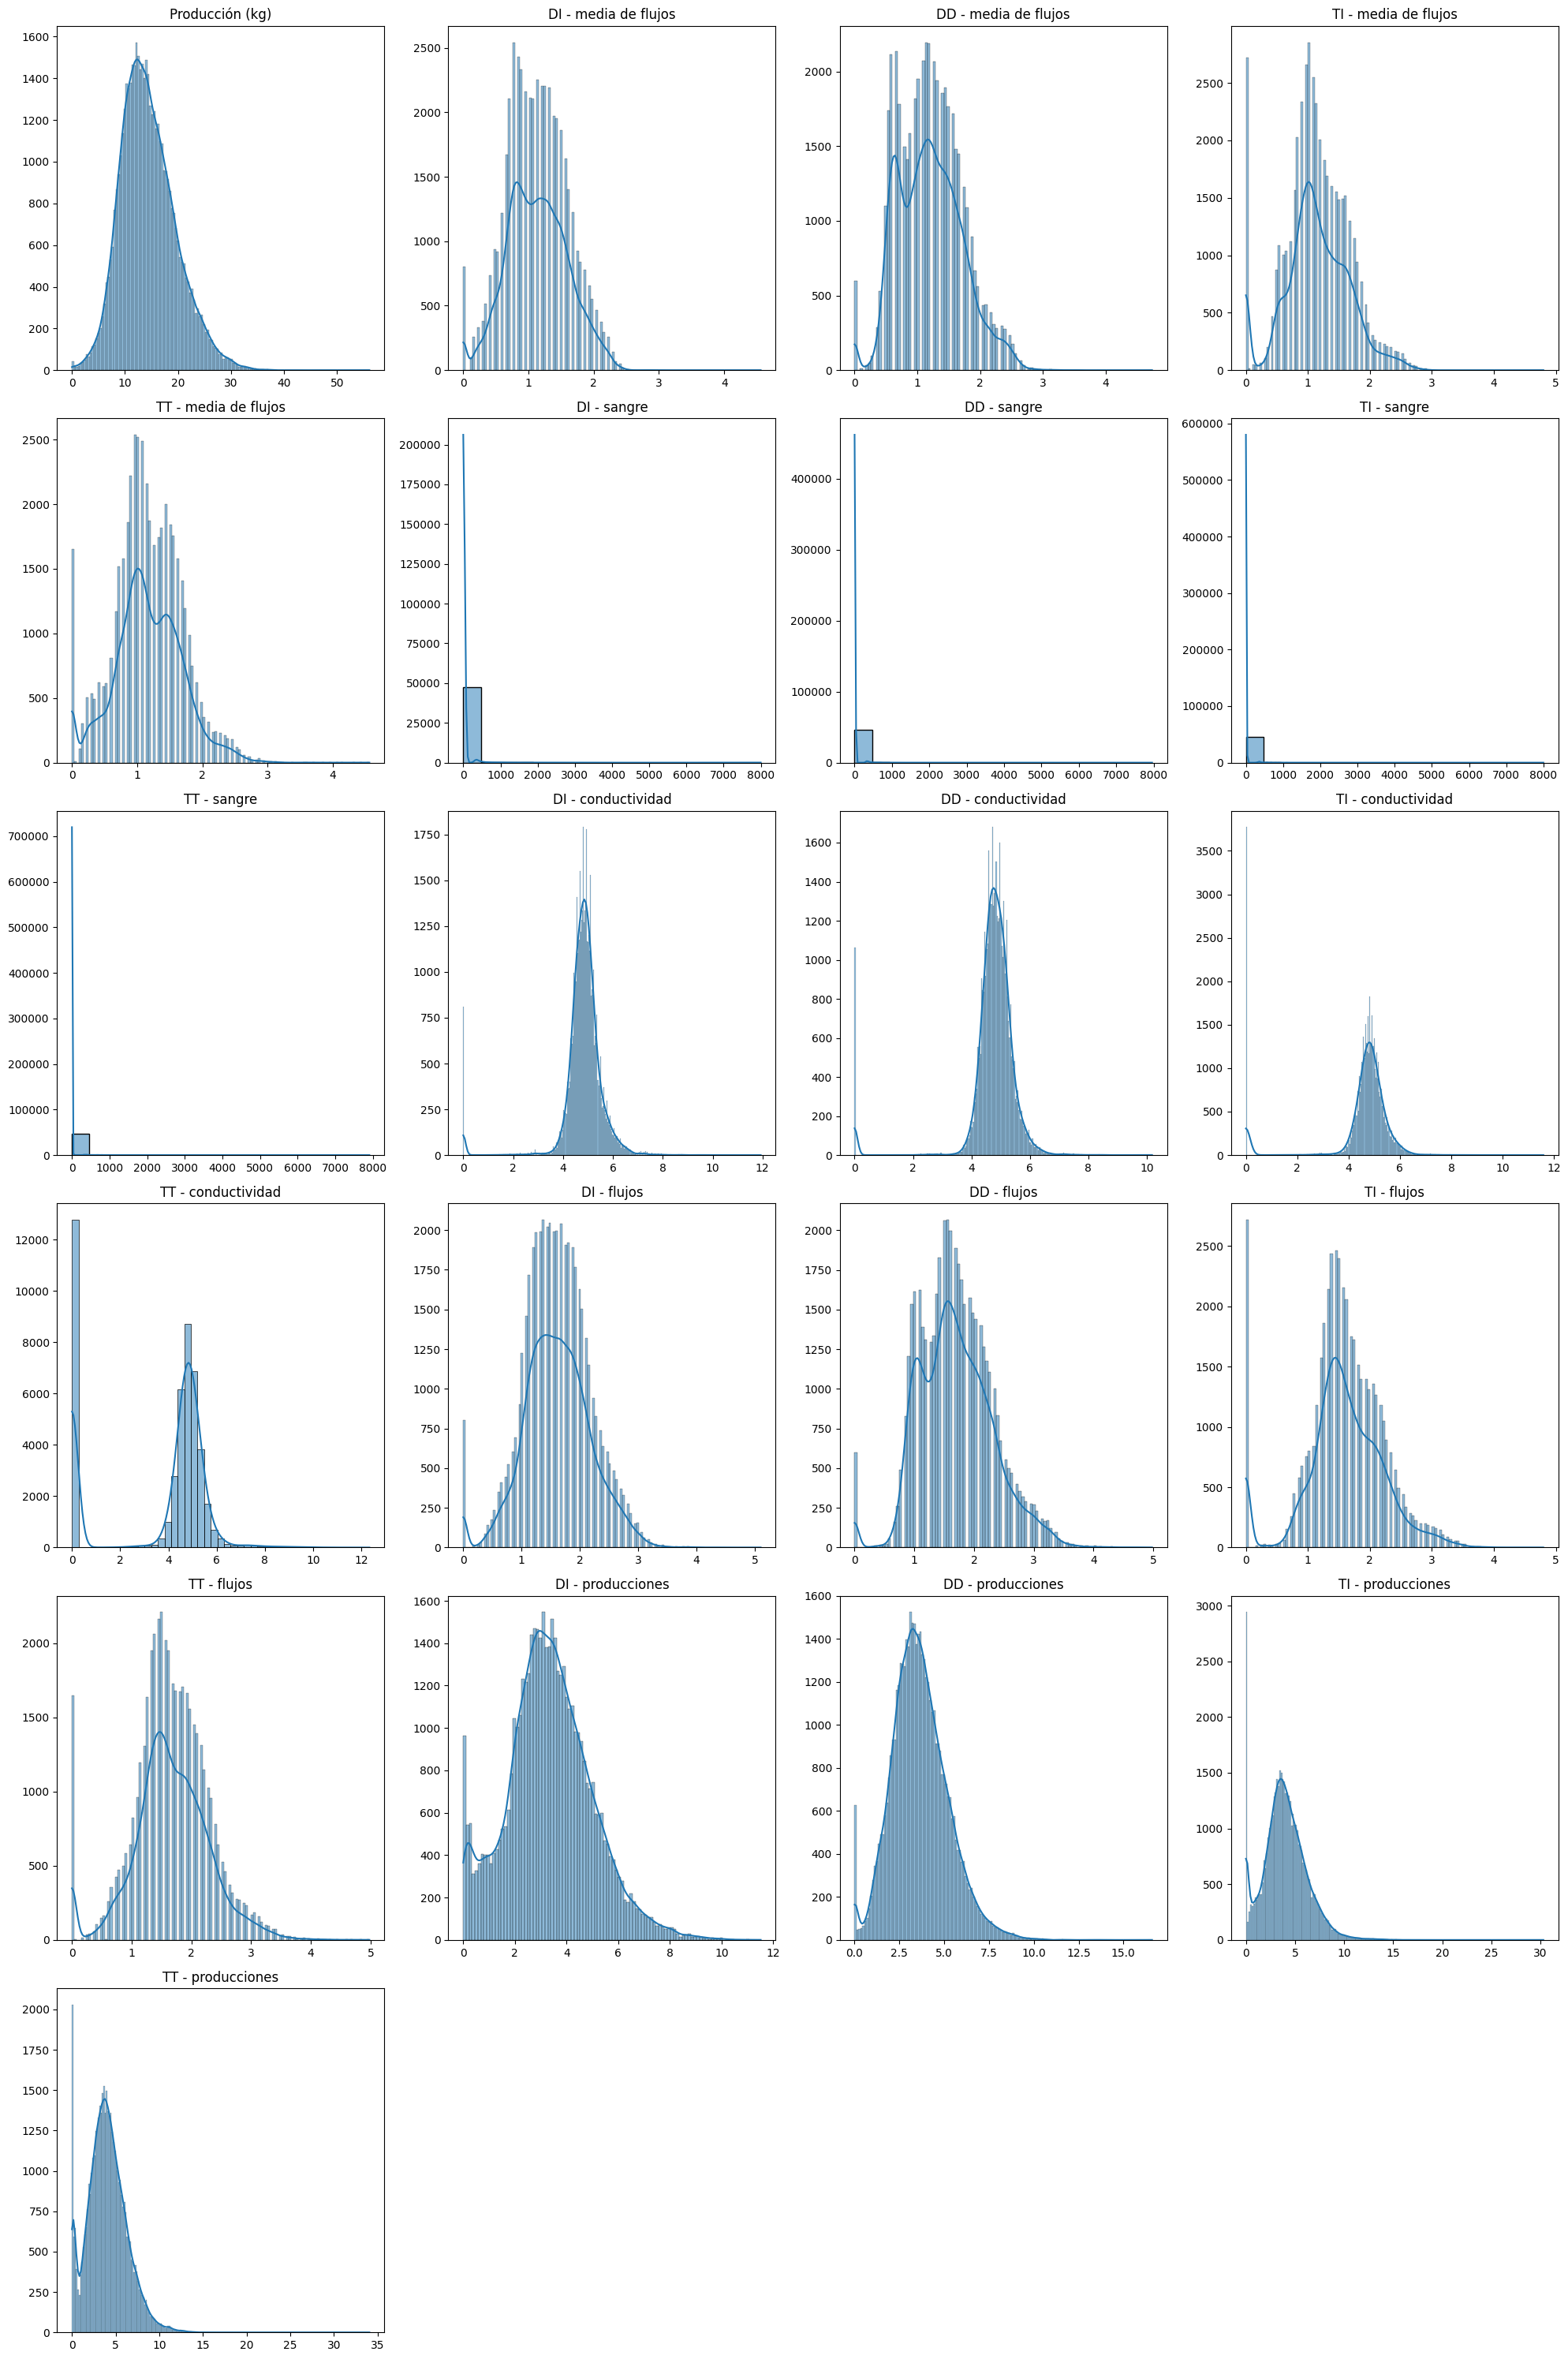

In [ ]:
# Select only numerical columns (excluding the newly created dummy variables)
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns.tolist()

# Exclude columns that were originally object types and converted to dummies
# We can identify them by checking the original object columns and removing the new boolean columns
original_object_cols = ['Hora de inicio', 'Acción', 'Duración (mm:ss)', 'Patada', 'Incompleto', 'Pezones no encontrados', 'Pezón', 'EO/PO', 'Destino Leche']
dummy_cols = [col for col in df_cleaned.columns if any(orig_col in col for orig_col in ['Patada', 'Incompleto', 'Pezones no encontrados']) and df_cleaned[col].dtype == 'bool']

numerical_cols_for_hist = [col for col in numerical_cols if col not in dummy_cols and col not in ['Ubre', 'Número de ordeño']]

# Determine the number of rows and columns for the subplots
n_cols = 4
n_rows = (len(numerical_cols_for_hist) + n_cols - 1) // n_cols

# Create histograms for the selected numerical columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols_for_hist):
    sns.histplot(df_cleaned[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

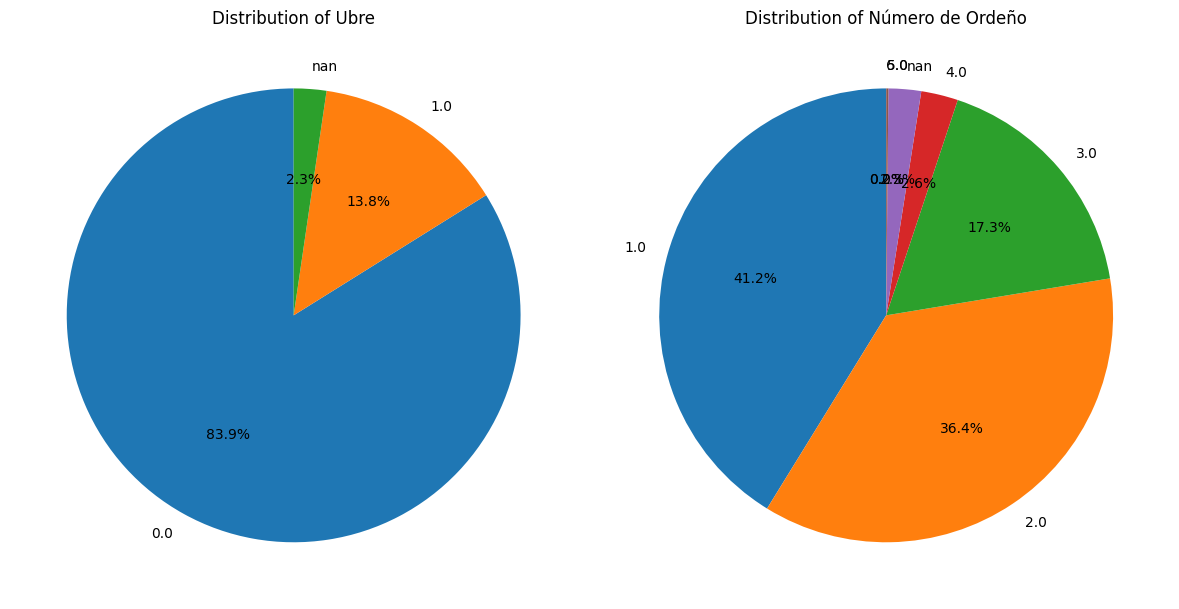

In [ ]:
# Create pie charts for 'Ubre' and 'Número de ordeño'

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for 'Ubre'
ubre_counts = df_cleaned['Ubre'].value_counts(dropna=False)
axes[0].pie(ubre_counts, labels=ubre_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Ubre')

# Pie chart for 'Número de ordeño'
numero_ordeno_counts = df_cleaned['Número de ordeño'].value_counts(dropna=False)
axes[1].pie(numero_ordeno_counts, labels=numero_ordeno_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Distribution of Número de Ordeño')

plt.tight_layout()
plt.show()

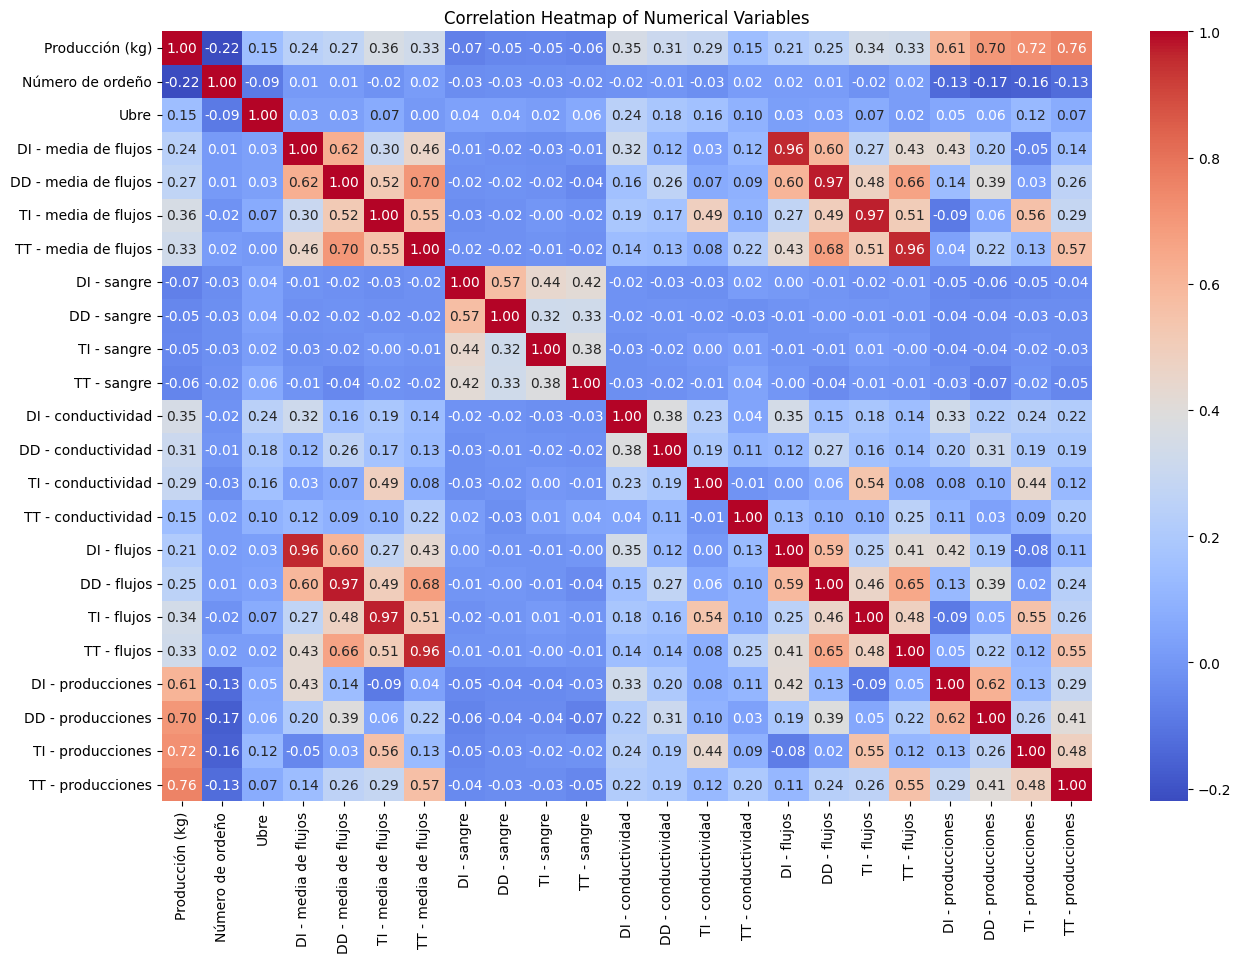

In [ ]:
# Select only numerical columns for correlation analysis, excluding boolean dummy variables
numerical_cols_for_corr = df_cleaned.select_dtypes(include=np.number).columns.tolist()
boolean_cols = df_cleaned.select_dtypes(include=bool).columns.tolist()
numerical_cols_for_corr = [col for col in numerical_cols_for_corr if col not in boolean_cols]


# Calculate the correlation matrix
correlation_matrix = df_cleaned[numerical_cols_for_corr].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

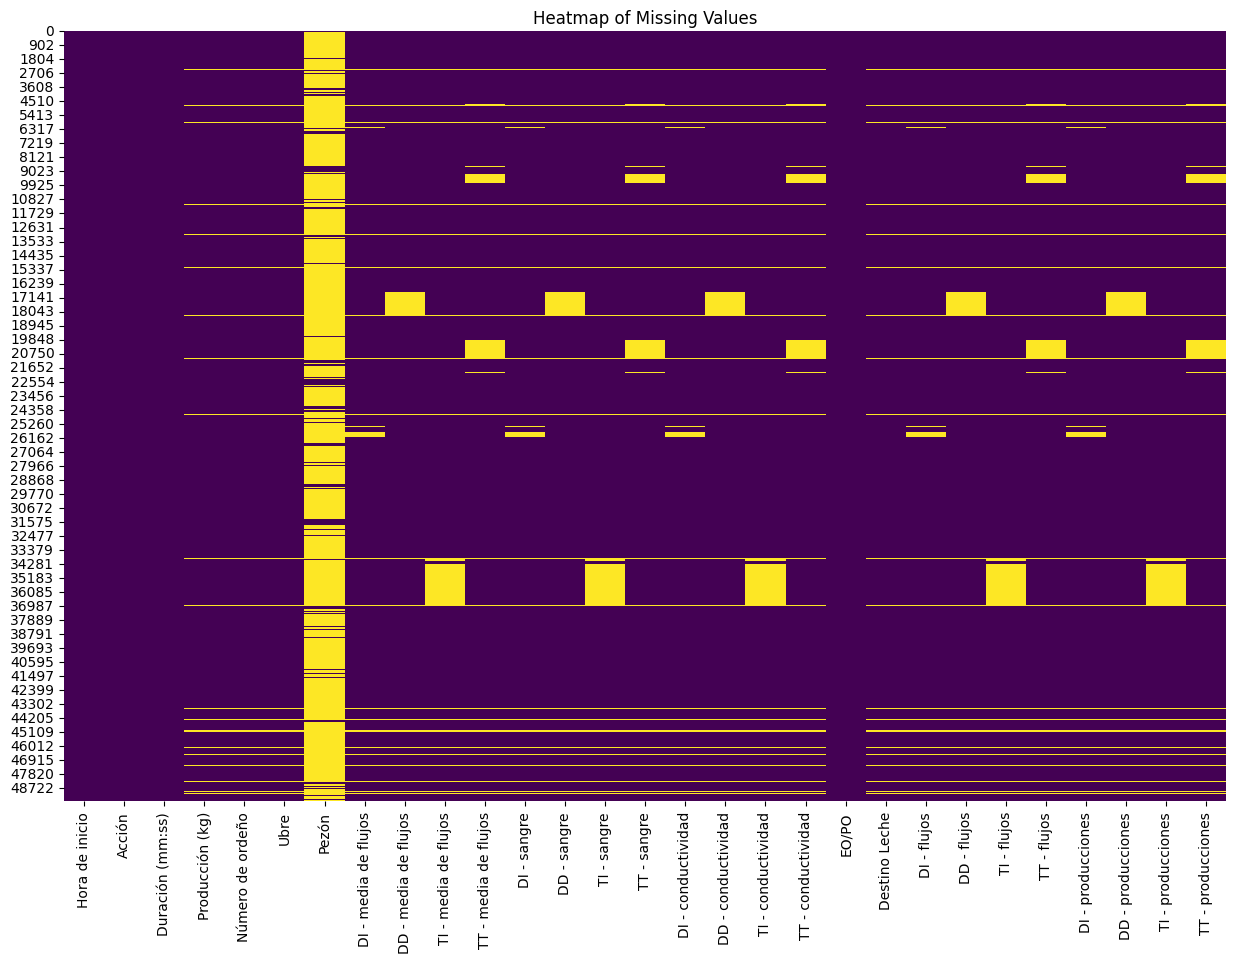

In [ ]:
# Exclude boolean columns from the heatmap
columns_for_heatmap = df_cleaned.select_dtypes(exclude=bool).columns.tolist()

plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned[columns_for_heatmap].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()